In [3]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from citipy import citipy

In [5]:
# CSV File
output_data_file = "output_data/cities.csv"

# Lat and Long Range
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# creating lists to add the lat and long
lat_lngs = []
cities = []

In [7]:
#Random Lat and Long
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [8]:
#cities close to our random lat and long
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [9]:
# city count
len(cities)

610

## Perform API Calls

In [13]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [14]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [15]:

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

        
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
   

Processing Record 1 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=new%20norfolk
Processing Record 2 of Set 1 | kigoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kigoma
Processing Record 3 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=atuona
Processing Record 4 of Set 1 | labrea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=labrea
City not found. Skipping...
Processing Record 5 of Set 1 | panaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=panaba
Processing Record 6 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hithadhoo
Processing Record 7 of Set 1 | arraial do cabo
http://api.openweat

Processing Record 3 of Set 2 | chitradurga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chitradurga
Processing Record 4 of Set 2 | sokyryany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sokyryany
Processing Record 5 of Set 2 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cherskiy
Processing Record 6 of Set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=georgetown
Processing Record 7 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hermanus
Processing Record 8 of Set 2 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cabedelo
Processing Record 9 of Set 2 | taolanaro
http://api.openweathermap.org/data/

City not found. Skipping...
Processing Record 5 of Set 3 | hanzhong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hanzhong
Processing Record 6 of Set 3 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vardo
Processing Record 7 of Set 3 | santa marta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=santa%20marta
Processing Record 8 of Set 3 | belle fourche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=belle%20fourche
Processing Record 9 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=provideniya
Processing Record 10 of Set 3 | kalaleh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kalaleh
Processing Record 11 of Set 3 | flinders


Processing Record 7 of Set 4 | kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kropotkin
Processing Record 8 of Set 4 | ayorou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ayorou
Processing Record 9 of Set 4 | porto santo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=porto%20santo
City not found. Skipping...
Processing Record 10 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=barentsburg
City not found. Skipping...
Processing Record 11 of Set 4 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kaitangata
Processing Record 12 of Set 4 | trelleborg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=trelleborg
Processin

Processing Record 9 of Set 5 | bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bereda
Processing Record 10 of Set 5 | farsund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=farsund
Processing Record 11 of Set 5 | kailua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kailua
Processing Record 12 of Set 5 | labutta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=labutta
City not found. Skipping...
Processing Record 13 of Set 5 | zhuozhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zhuozhou
City not found. Skipping...
Processing Record 14 of Set 5 | lebedinyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lebedinyy
Processing Record 15 of Set 5 | vila 

Processing Record 12 of Set 6 | turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=turayf
Processing Record 13 of Set 6 | baykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=baykalsk
Processing Record 14 of Set 6 | havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=havoysund
Processing Record 15 of Set 6 | craigieburn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=craigieburn
Processing Record 16 of Set 6 | jiamusi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jiamusi
Processing Record 17 of Set 6 | khormuj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=khormuj
City not found. Skipping...
Processing Record 18 of Set 6 | beidao
http://api.open

Processing Record 15 of Set 7 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pevek
Processing Record 16 of Set 7 | narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=narasannapeta
Processing Record 17 of Set 7 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wanning
Processing Record 18 of Set 7 | radcliff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=radcliff
Processing Record 19 of Set 7 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vila%20velha
Processing Record 20 of Set 7 | tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tiarei
Processing Record 21 of Set 7 | srednekolymsk
http://api.openweathermap.org/da

Processing Record 18 of Set 8 | two hills
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=two%20hills
Processing Record 19 of Set 8 | lhokseumawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lhokseumawe
Processing Record 20 of Set 8 | lalsot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lalsot
Processing Record 21 of Set 8 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 8 | nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nchelenge
Processing Record 23 of Set 8 | kurkent
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kurkent
Processing Record 24 of Set 8 | petropav

Processing Record 22 of Set 9 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=norman%20wells
Processing Record 23 of Set 9 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tessalit
Processing Record 24 of Set 9 | freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=freeport
Processing Record 25 of Set 9 | zambezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=zambezi
Processing Record 26 of Set 9 | roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=roald
Processing Record 27 of Set 9 | mae hong son
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mae%20hong%20son
Processing Record 28 of Set 9 | redmond
http://api.openweathermap.or

Processing Record 25 of Set 10 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rio%20gallegos
Processing Record 26 of Set 10 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=puerto%20ayacucho
Processing Record 27 of Set 10 | kholmogory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kholmogory
Processing Record 28 of Set 10 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port-cartier
Processing Record 29 of Set 10 | kontagora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kontagora
Processing Record 30 of Set 10 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ratnagiri
Processing Record 31 of Set 10 | w

Processing Record 28 of Set 11 | vasteras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vasteras
Processing Record 29 of Set 11 | bandundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bandundu
Processing Record 30 of Set 11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sioux%20lookout
Processing Record 31 of Set 11 | jinxiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jinxiang
Processing Record 32 of Set 11 | astana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=astana
Processing Record 33 of Set 11 | mastic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=mastic
Processing Record 34 of Set 11 | quelimane
http://api.openweathermap.org

Processing Record 31 of Set 12 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=broome
Processing Record 32 of Set 12 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dwarka
Processing Record 33 of Set 12 | san martin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=san%20martin
Processing Record 34 of Set 12 | kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kachiry
Processing Record 35 of Set 12 | wau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=wau
City not found. Skipping...
Processing Record 36 of Set 12 | yandoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yandoon
City not found. Skipping...
Processing Record 37 of Set 12 | ama

In [17]:
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [18]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,86,AU,1573146811,82,-42.78,147.06,42.01,2.35
1,kigoma,29,TZ,1573146811,68,-4.88,29.64,80.20,5.53
2,atuona,39,PF,1573146811,79,-9.80,-139.03,79.52,15.12
3,panaba,28,MX,1573146811,68,21.28,-88.27,85.15,10.00
4,hithadhoo,66,MV,1573146811,70,-0.60,73.08,82.45,9.95


## Latitude vs Temperature Plot

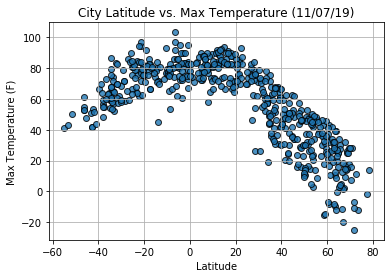

In [19]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

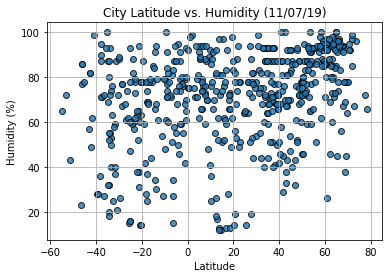

In [20]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

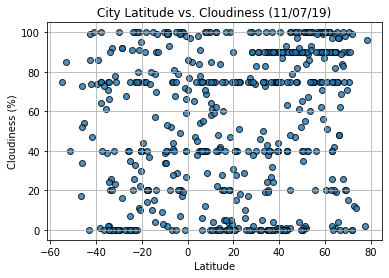

In [21]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

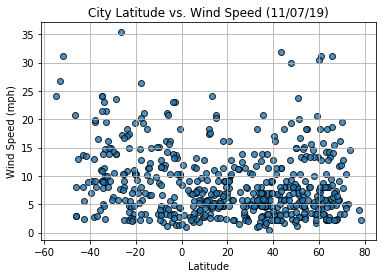

In [22]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [29]:

##Analysis
#There is a correlation between the temprature and the city lattitude.

#The correlation between the city lattiture and the humidity is not that strong .Although it is notable that there is a cluster of northern hemsphere cities that hold higher humidity.

#No strong correlation has been detected between the city lattitude and level of cloudiness but we can see there is a notable amount of cities near the 0 and 90 % cloudiness

#It is notable that there is not a very strong relationship between the city lattiture and the speed of the wind. Also we can conclude that in the northen hemsphere there are some cities with more than 25 miles per hour of wind

#Weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The Northern hemisphere has lower temprature comparing to the Southern Hemisphere at this time of year

#Wind speed is mostly betweeen 0 and 15 mph despite of the city latitude